In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

data = pd.read_csv("C:\\Users\\bhimr\\OneDrive\\Documents\\EDA1\\Cardiotocographic.csv")

In [2]:
data.head(5)

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


In [4]:
data.dtypes

LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object

In [5]:
#Detect Duplicate values
data[data.duplicated()].shape

(2, 14)

In [6]:
data[data.duplicated()]

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
1115,122.0,0.000000,0.0,0.000000,0.0,0.0,0.0,19.0,1.9,0.0,15.1,39.0,0.0,1.0
1458,148.0,0.004717,0.0,0.002358,0.0,0.0,0.0,40.0,0.9,0.0,10.6,35.0,0.0,1.0


In [7]:
data = data.drop_duplicates()

In [8]:
data[data.duplicated()].shape

(0, 14)

In [9]:
#The duplicate rows are removed


In [10]:
#data2 = data1.rename({'LB' : 'Baseline HFR' , 'AC' : 'Accelaration' ,'FM' : 'Fetal Movements' , 'UC':'uterin Contraction' , 'DL' : 'Light Decelaration'},axis = 1)
#data2 = data1.rename({'DS':'Severe Decelerations', 'DP' : 'Prolonged Decelerations','ASTV' : 'Percentage of Abnormal Short-Term Variability','MSTV' : 'Mean Short-Term Variability'},axis = 1)
#data2 = data1.rename({'ALTV':'Percentage of Abnormal Long-Term Variability','MLTV':'Mean Long-Term Variability'},axis=1)


In [11]:
#Detect the missing values
data.isnull().sum()

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

In [12]:
# Mean imputation in each column where there are missing values
columns = ['LB','AC','DS','DP','MLTV','Width','Tendency','NSP']
for column in columns:
    data[column] = data[column].fillna(data[column].median())

In [13]:

data.isnull().sum()

LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64

In [14]:
data

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73.0,0.5,43.000000,2.4,64.0,0.999926,2.000000
1,132.000000,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.000000,10.4,130.0,0.000000,1.000000
2,133.000000,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.000000,13.4,130.0,0.000000,1.000000
3,134.000000,0.002561,0.000000,0.007742,0.002561,0.0,0.0,16.0,2.4,0.000000,23.0,117.0,1.000000,1.000000
4,131.948232,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.000000,19.9,117.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.000000,0.000000,0.961268,0.007426,0.000000,0.0,0.0,79.0,0.2,25.000000,7.2,40.0,0.000000,2.000000
2122,140.000000,0.000775,0.000000,0.006979,0.000000,0.0,0.0,78.0,0.4,22.000000,7.1,66.0,1.000000,2.000000
2123,140.000000,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79.0,0.4,20.000000,6.1,67.0,1.000000,1.990464
2124,140.000000,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78.0,0.4,27.000000,7.0,66.0,1.000000,2.000000


In [15]:
#data2.isnull().sum()

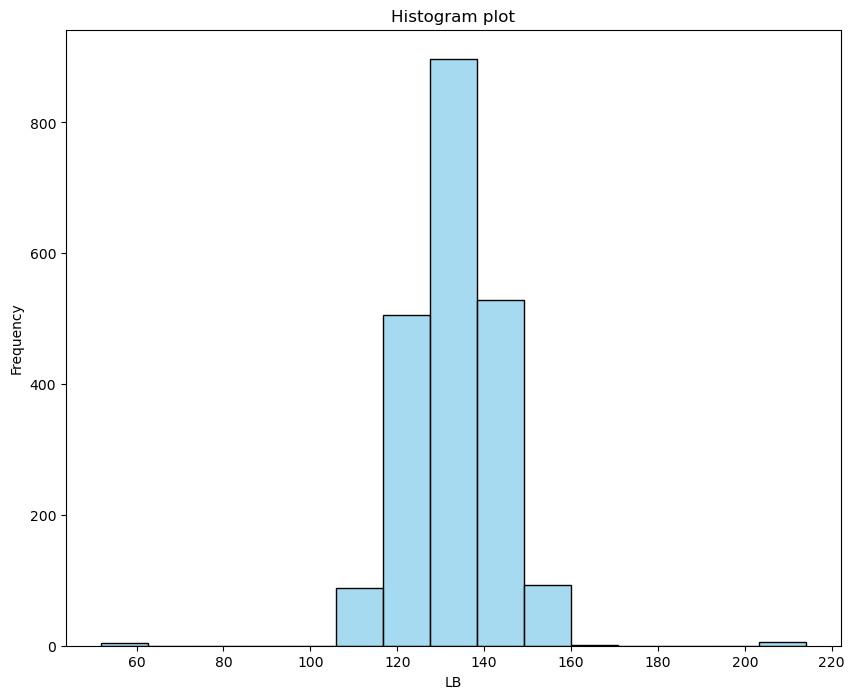

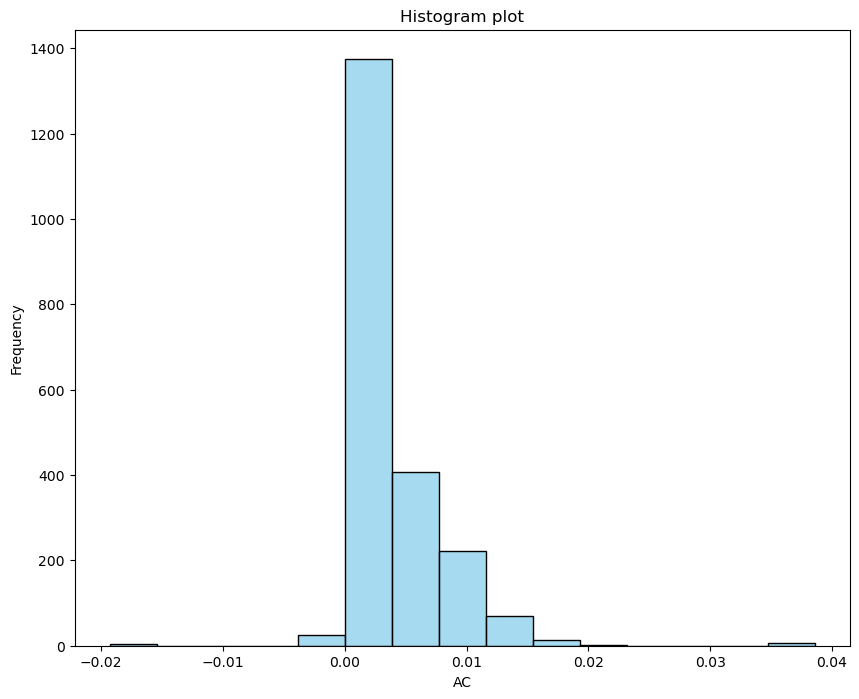

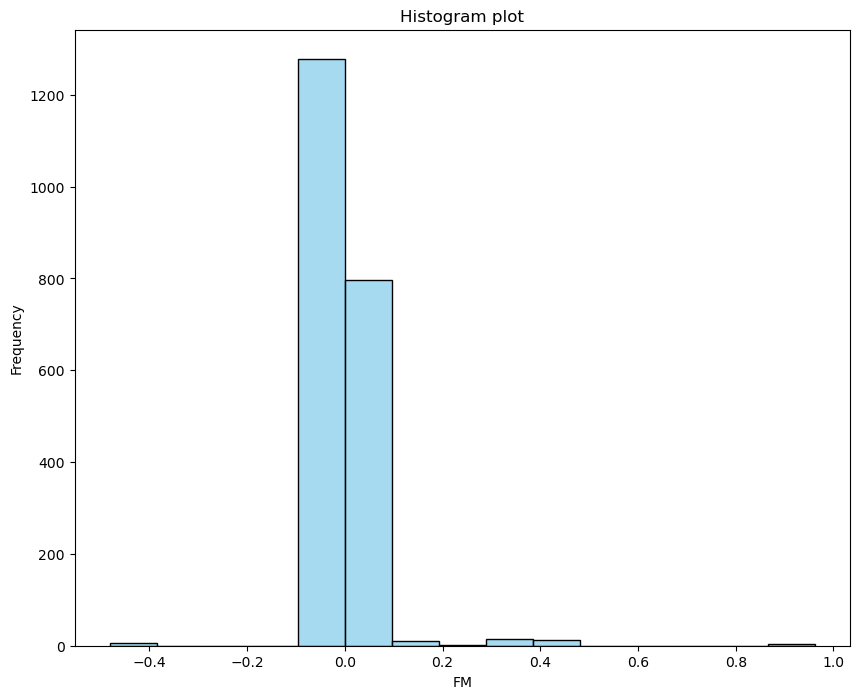

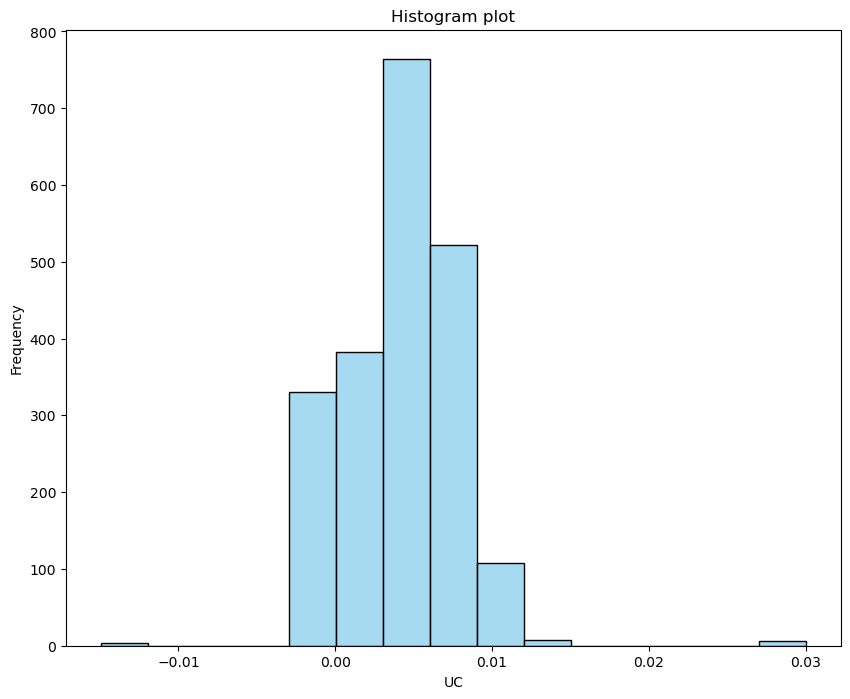

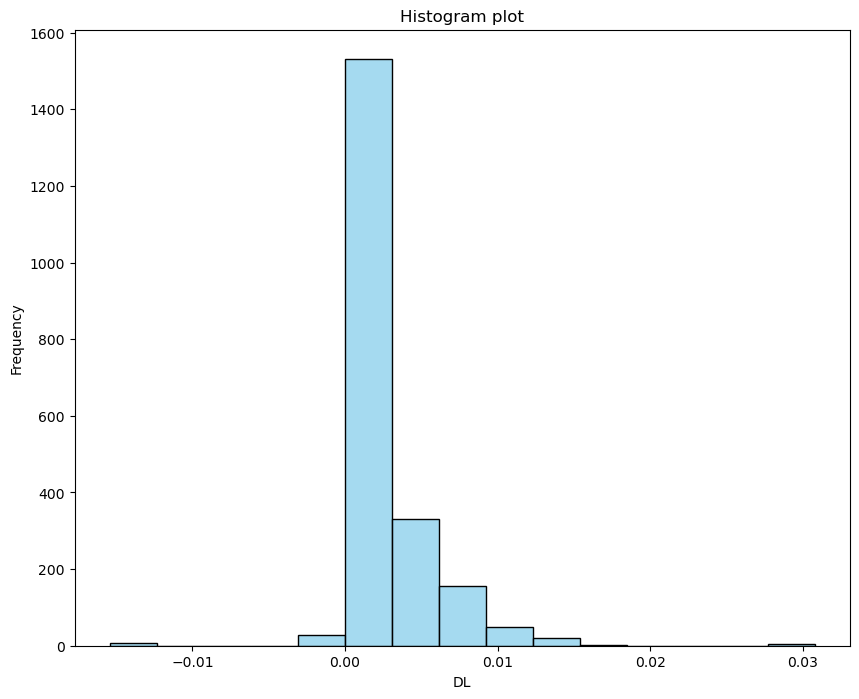

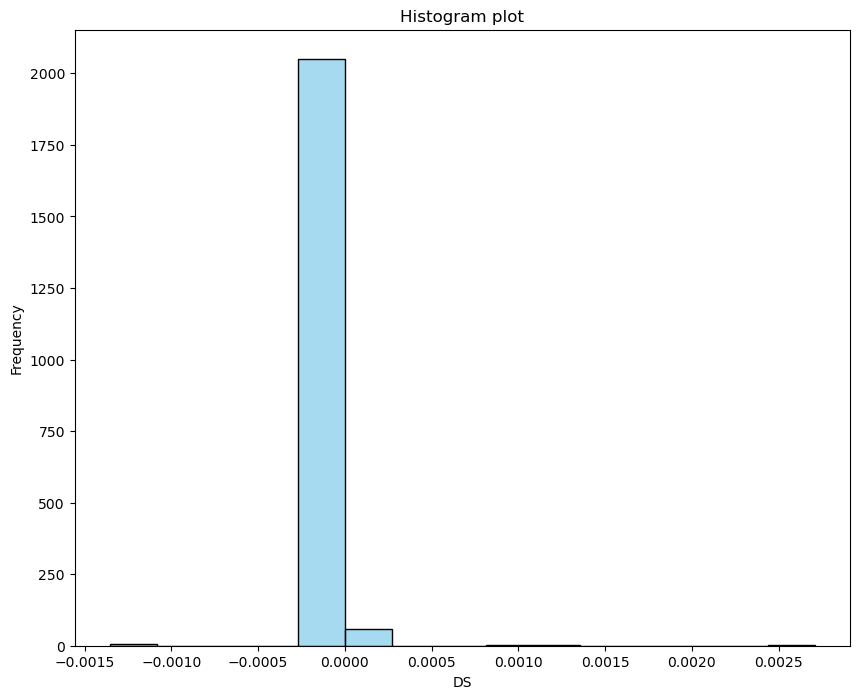

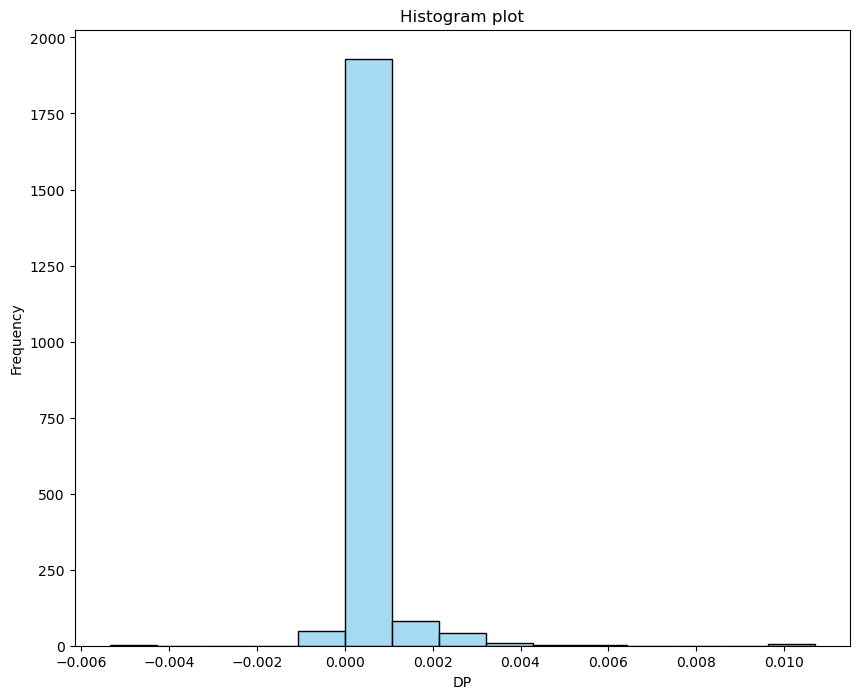

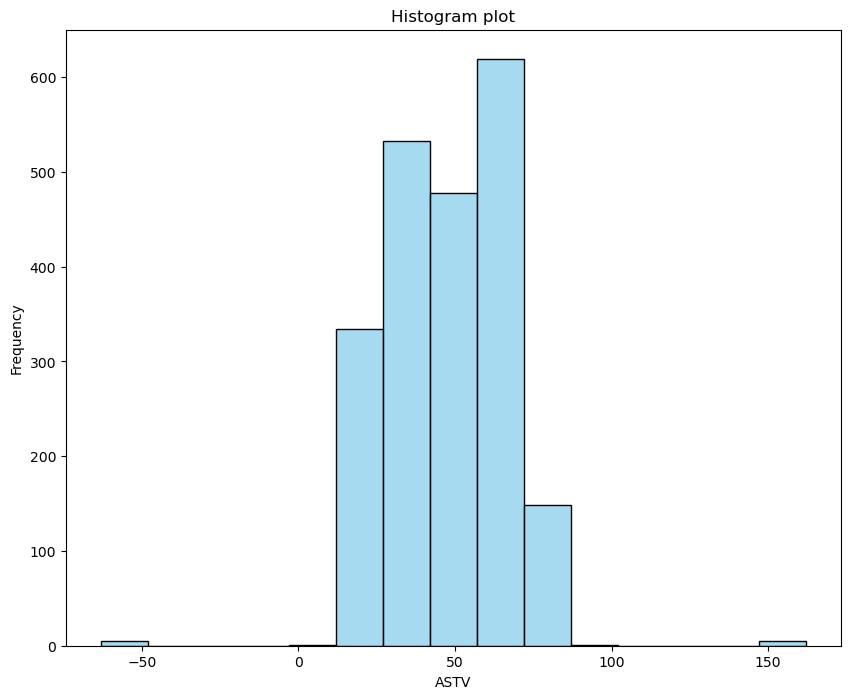

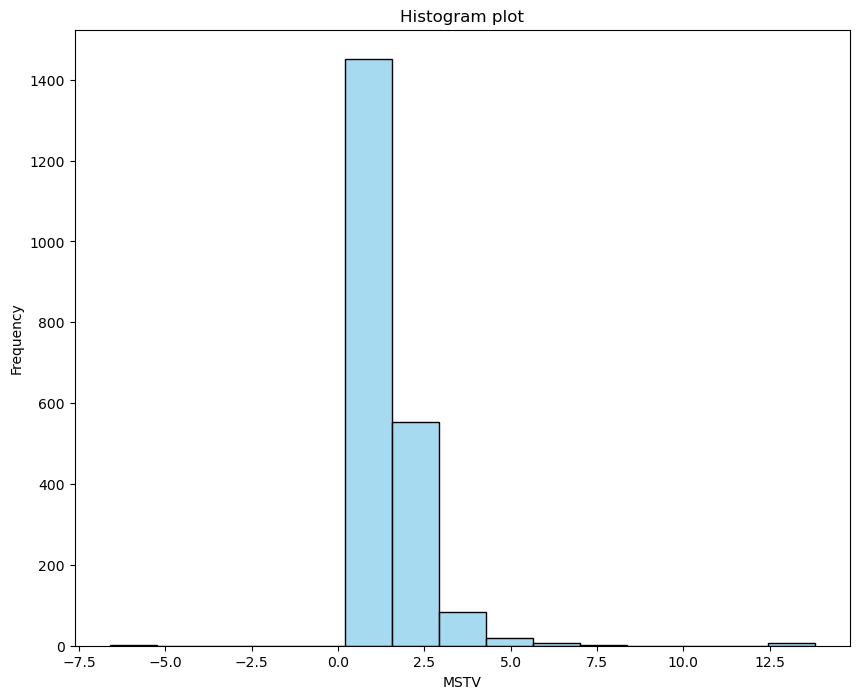

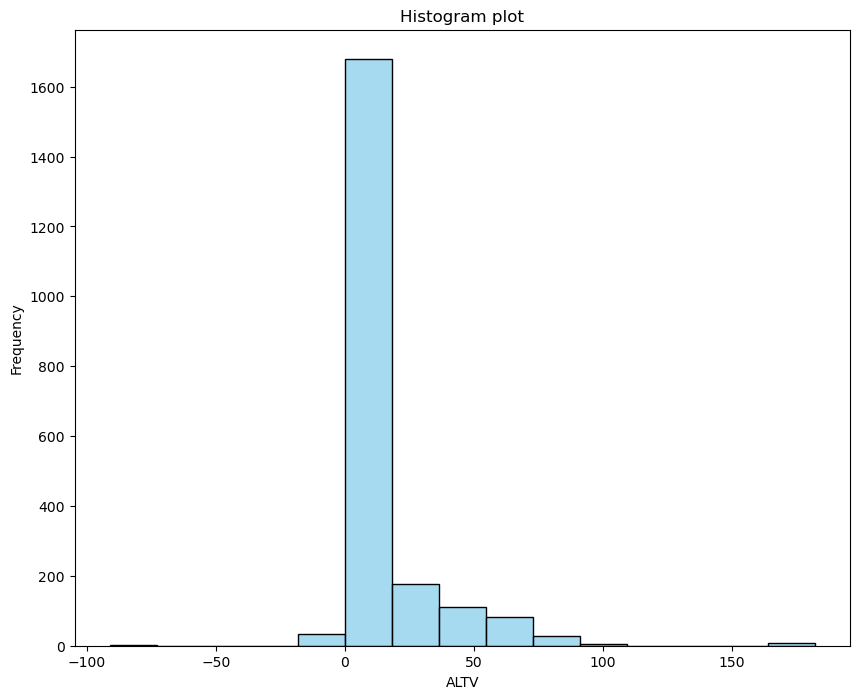

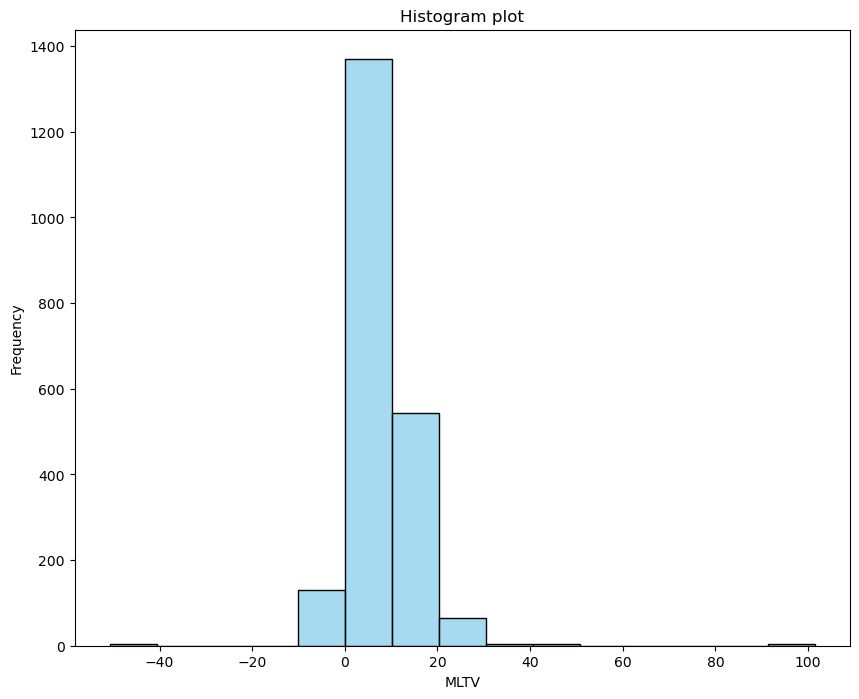

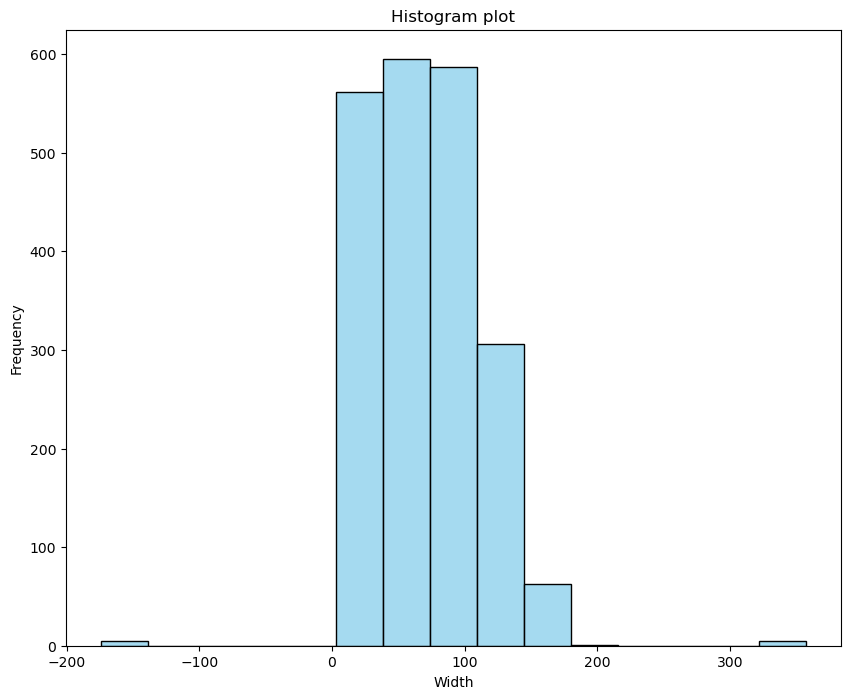

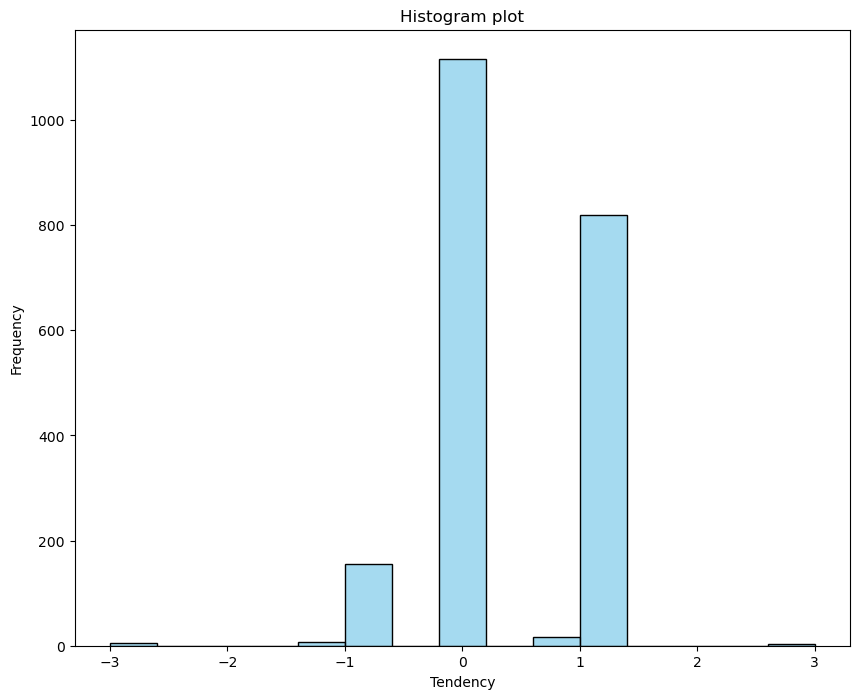

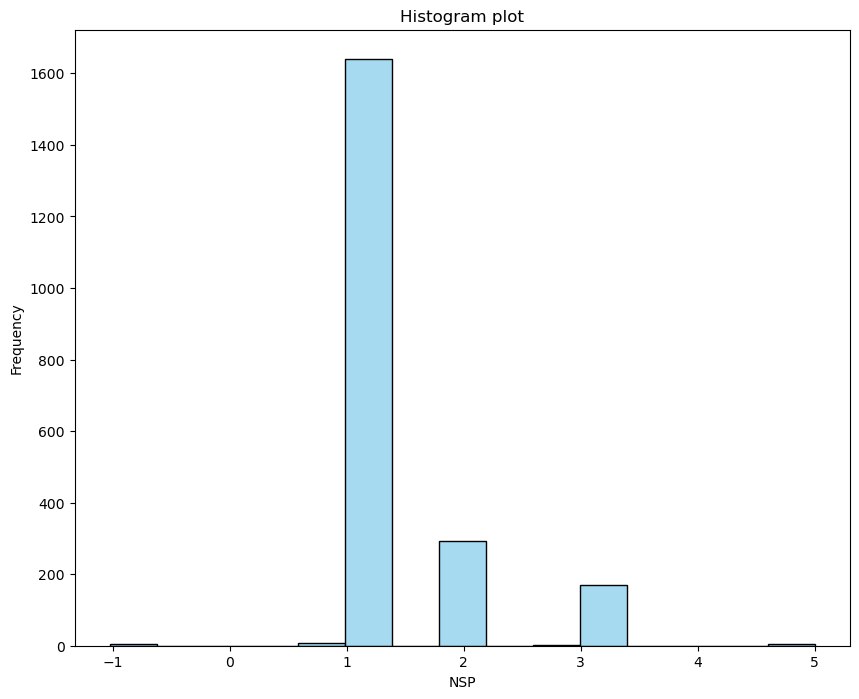

In [16]:
#Detecting outliers and treating outliers
# 1Sst Histogram plot
for columns in data.columns:
    plt.figure(figsize = (10,8))
    sns.histplot(data[columns],bins = 15,kde = False,color = 'Skyblue',edgecolor = 'black')
    plt.title("Histogram plot")
    plt.xlabel(columns)
    plt.ylabel('Frequency')
    plt.show()
    


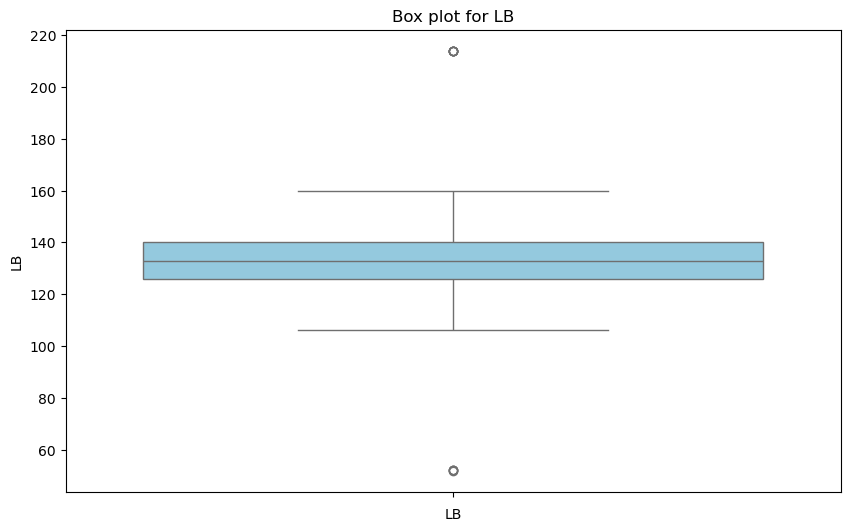

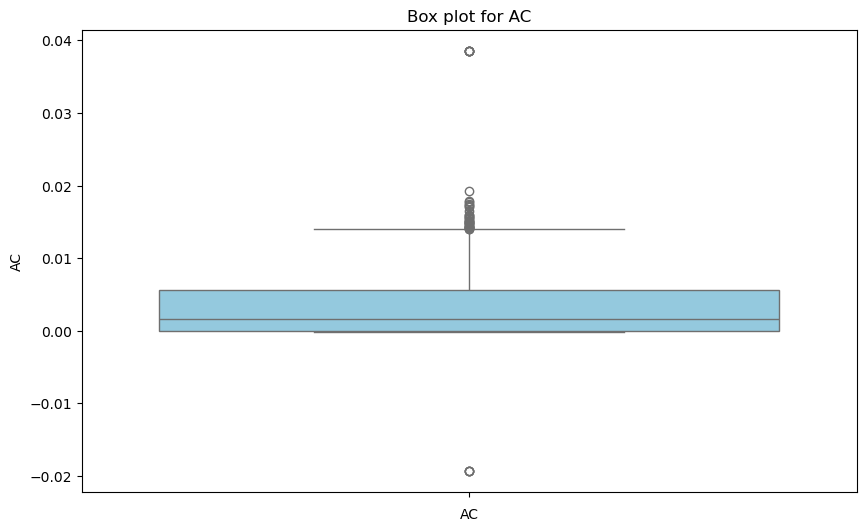

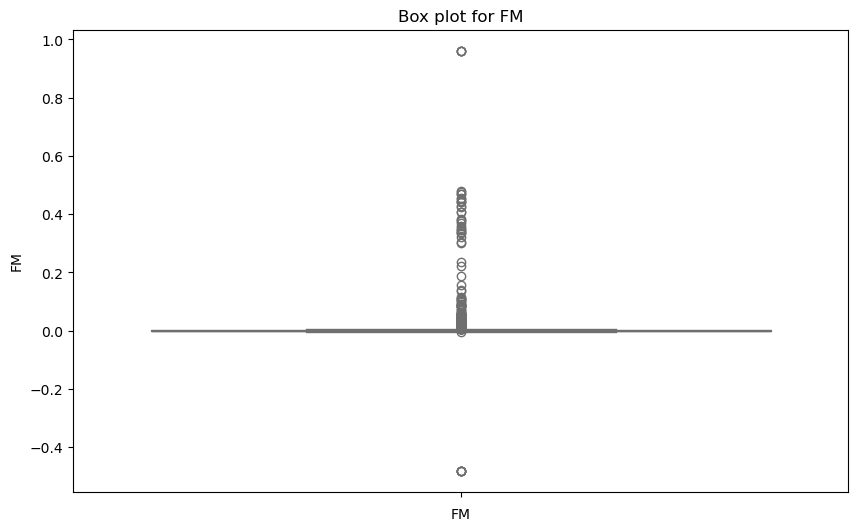

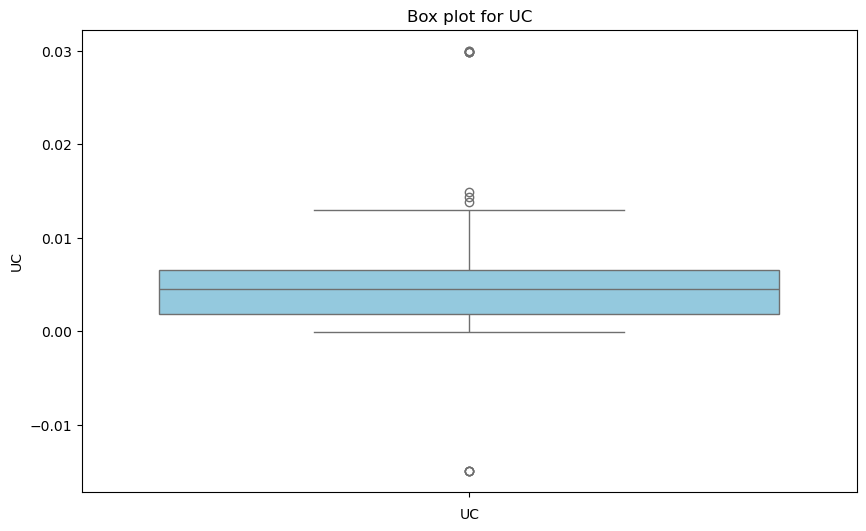

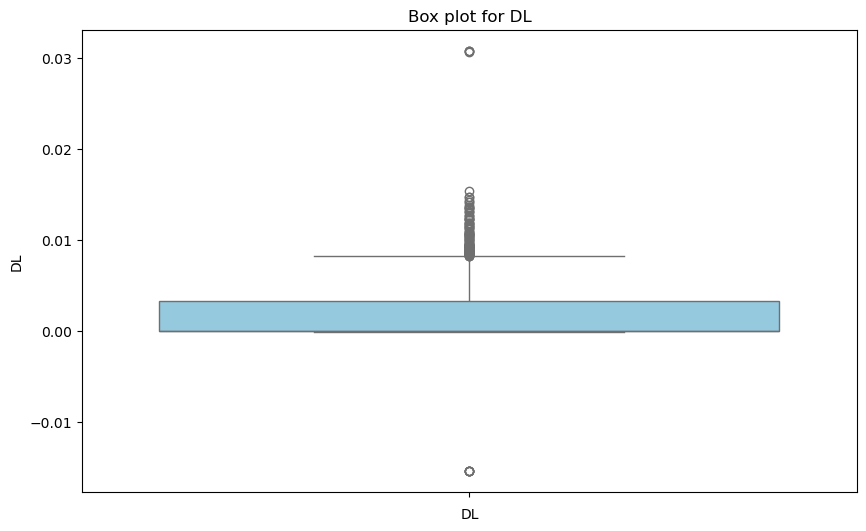

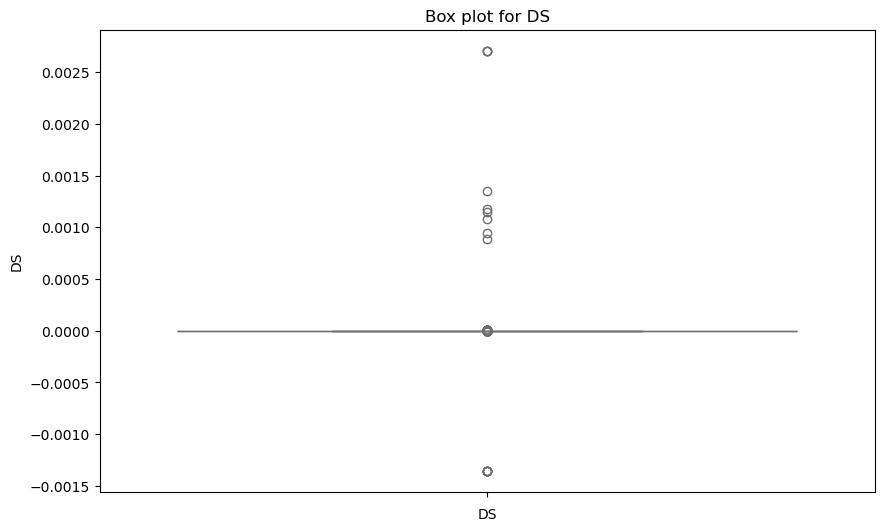

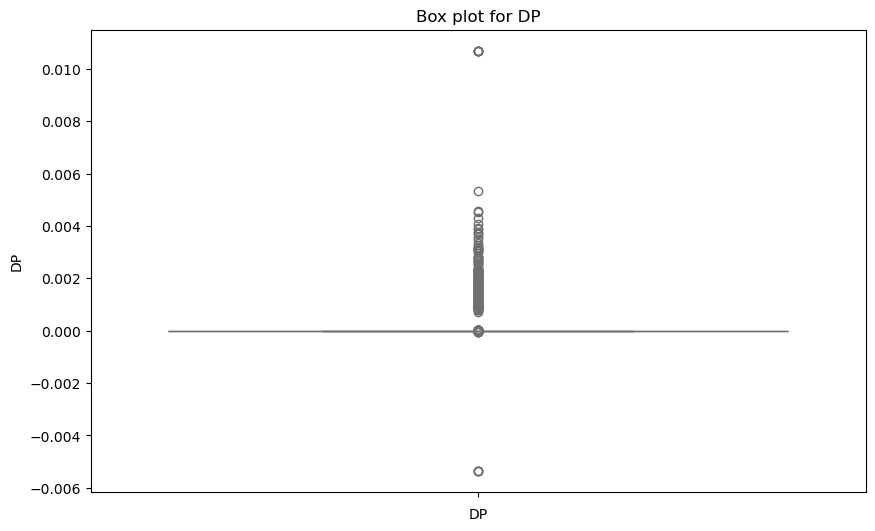

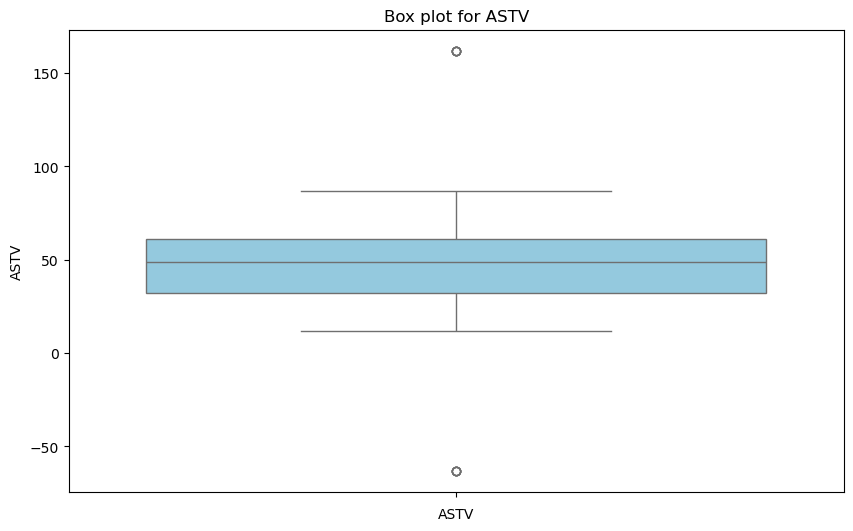

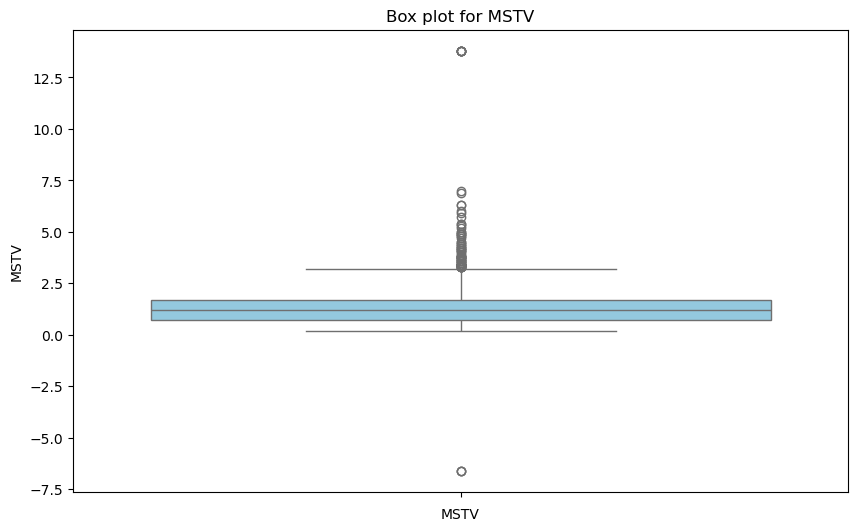

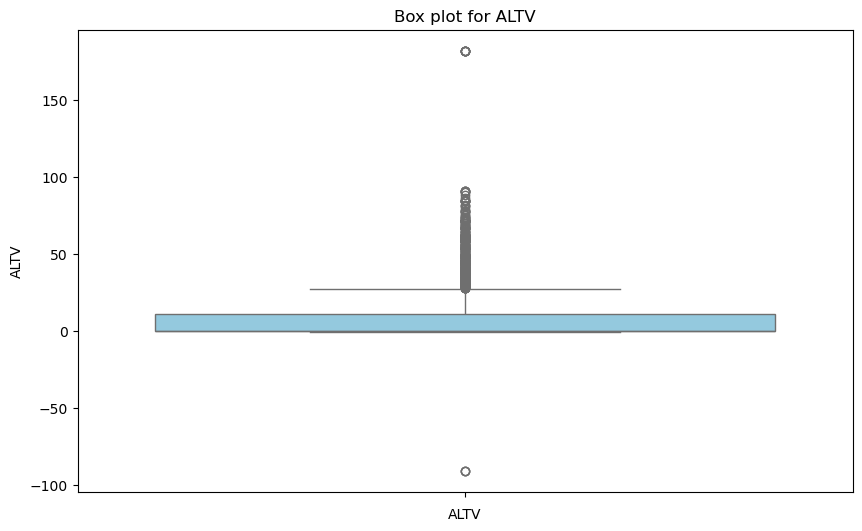

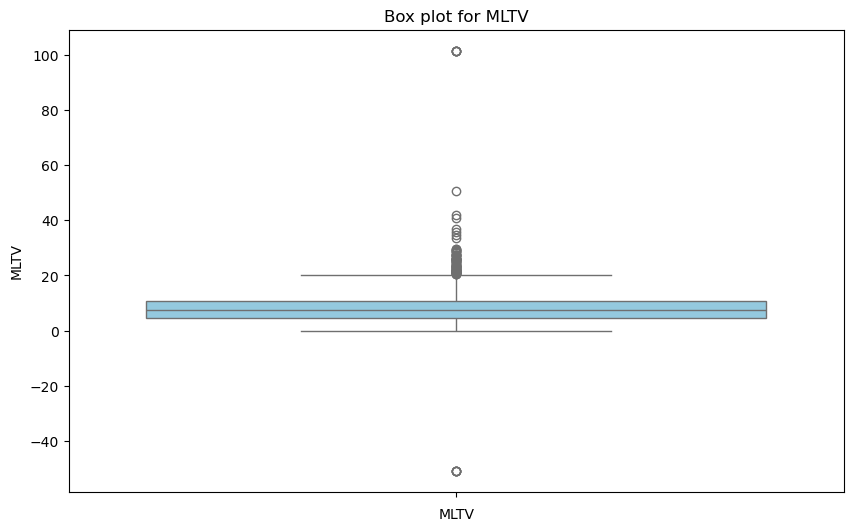

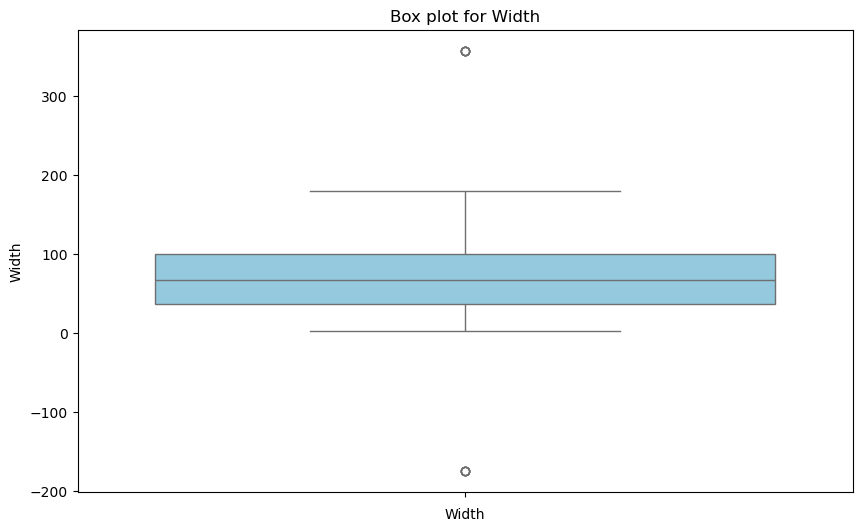

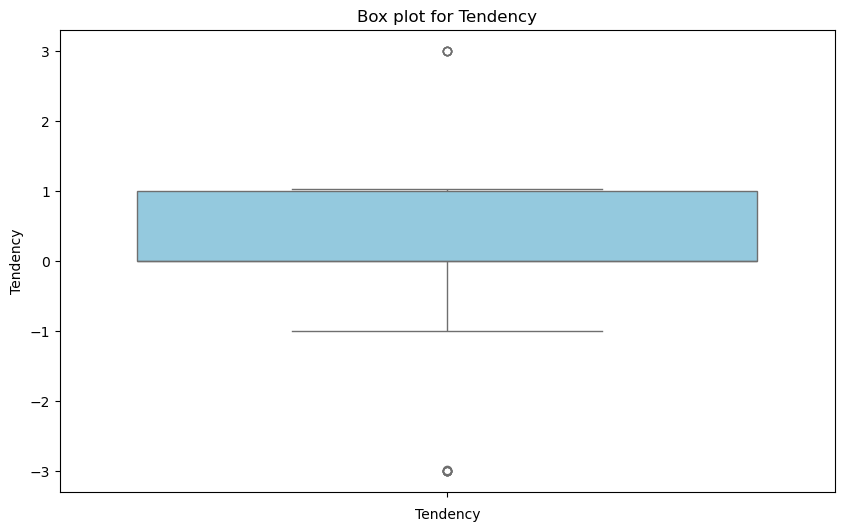

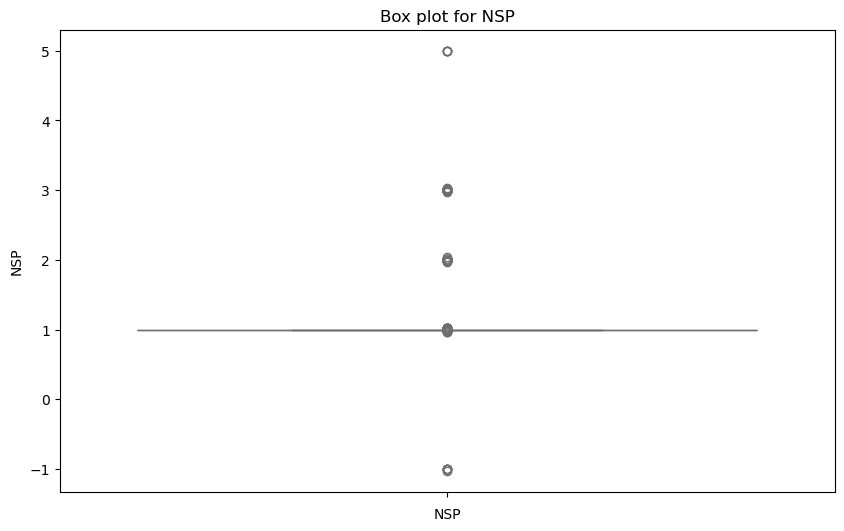

In [17]:
#Outliers using Box  plot
for column in data.columns:
    plt.figure(figsize=(10, 6))
    
    # Check if the column is numeric to avoid errors with categorical data
    if pd.api.types.is_numeric_dtype(data[column]):
        sns.boxplot(y=data[column], color='skyblue')
        plt.title(f'Box plot for {column}')
        plt.xlabel(column)
        plt.show()
    else:
        print(f"Skipping non-numeric column: {column}")

In [18]:
import pandas as pd

# Example DataFrame (replace this with your actual dataset)
# data = pd.read_csv('your_dataset.csv') # Load your actual data here

# Function to find outliers using IQR method
for column in data.columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    data[column] = np.where((data[column] < lower_bound) | (data[column] > upper_bound),data[column].median(),data[column])
    



    

In [19]:
data.describe()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,2124.000000,2124.000000,2124.000000,2124.000000,2124.000000,2124.0,2124.0,2124.000000,2124.000000,2124.000000,2124.000000,2124.000000,2124.000000,2124.0
mean,133.262356,0.002930,0.000555,0.004344,0.001325,0.0,0.0,47.010105,1.234875,2.642895,7.576970,70.318585,0.316364,1.0
std,9.739754,0.003507,0.001300,0.002911,0.002156,0.0,0.0,17.154622,0.685146,5.750917,4.436633,38.620992,0.608131,0.0
min,106.000000,-0.000185,-0.003435,-0.000132,-0.000124,0.0,0.0,11.799846,0.200000,-1.043619,-0.200788,3.000000,-1.006614,1.0
25%,126.000000,0.000000,0.000000,0.001880,0.000000,0.0,0.0,32.000000,0.700000,0.000000,4.671705,37.000000,0.000000,1.0
50%,133.000000,0.001634,0.000000,0.004486,0.000000,0.0,0.0,49.000000,1.200000,0.000000,7.400000,67.486468,0.000000,1.0
75%,140.000000,0.005107,0.000000,0.006505,0.002201,0.0,0.0,61.000000,1.600000,1.000000,10.200000,99.000000,1.000000,1.0
max,160.000000,0.014024,0.006272,0.012987,0.008197,0.0,0.0,87.000000,3.200000,27.000000,20.040354,180.000000,1.023635,1.0


In [ ]:
#import seaborn as sns
#sns.pairplot(data)

In [ ]:
correlation = data.corr()
print(correlation)

In [ ]:
#STANDARIZATION
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

In [ ]:
print(scaled_data)